## Importieren der Module

In [1]:
from pathlib import Path  
import glob
import os
from collections import Counter
from nltk.tag import pos_tag
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.text import Text
import pandas as pd
from collections import defaultdict

-----------

## Funktionen zur Analyse für anteiliges Wortvorkommen

In [3]:
#texte einlesen und zusammenfügen
def read_and_process_text_files(text_files):
    #liste der texte
    texts_all = []

    #durchlaufen aller textdateien und einlesen des inhalts
    for file_path in text_files:
        with open(file_path, 'r', encoding='utf-8') as file:
            content = file.read()
            texts_all.append(content)

    #anzahl der gefundenen und eingelesenen textdateien ausgeben
    print(f"Anzahl der Textdateien: {len(texts_all)}")

    #alle texte in ein einzelnes dokument zusammenfassen und in wörter aufteilen
    texts_all = ' '.join(texts_all)
    wordlist = texts_all.split()

    #gesamtlänge des textes (in wörtern) ausgeben
    print(f"Gesamte Anzahl der Wörter: {len(wordlist)}")
    print(wordlist[:40])

    return wordlist

In [5]:
#word counter
def count_and_print_most_frequent_words(wordlist, n):
    #wörter zählen
    word_counts = Counter(wordlist)

    #die 20 häufigsten wörter finden
    most_frequent_words = word_counts.most_common(n)
    
    #die häufigsten Wörter mit ihrer anzahl und relativen häufigkeit ausgeben
    for idx, (word, count) in enumerate(most_frequent_words, 1):
        relative_frequency = round(count / len(wordlist), 5)
        print(f"{idx}. {word}: {count}, {relative_frequency}")

In [7]:
#word cloud erstellen
def generate_word_cloud(wordlist):
    #textliste in string umwandeln für word cloud
    text_wc = ' '.join(wordlist)

    #wordcloud-objekt erstellen
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap="viridis").generate(text_wc)

    #wordcloud zeichnen
    plt.figure(figsize=(10, 5), dpi=300)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [9]:
#für spätere einzelwortanalyse: zu untersuchendes wort eingeben (z.B. "war", "jews" etc.)
word_input = input("Bitte das Wort eingeben, das gezählt werden soll: ").lower()

#wortfrequenz für bestimmtes wort herausfinden
def count_specific_word(wordlist, word_input):
    # Wortliste nach Eingabe zählen lassen
    count_h = wordlist.count(word_input)

    # Ergebnis ausgeben
    if count_h > 0:
        relative_frequency = round(count_h / len(wordlist), 6)
        print(f"Häufigkeit von '{word_input}': {count_h} mal mit einer Frequenz von {relative_frequency}")
    else:
        print(f"'{word_input}' wurde nicht gefunden.")

Bitte das Wort eingeben, das gezählt werden soll:  war


## Vergleich über anteiliges Wortvorkommen

Hinweis: Bei allen eingelesenen Texten wurden bereits die Stoppwörter und Interpunktionen entfernt. Zum Cleaning und direkten Abspeichern wurden mit Python die JupyterNotebook-Dateien 00cleaner.ipynb, clean_mytrump, clean_mytrump02, clean_mybiden, clean_mybiden02, clean_mybush, clean_mybush02, clean_myobama und clean_myobama02 programmiert.

In [25]:
input_pos = input("Was soll untersucht werden? allwords, nouns, adjectives oder verbs?").lower()

Was soll untersucht werden? allwords, nouns, adjectives oder verbs? verbs


#### Hitler

In [27]:
while True: 
    input_path_hitler = input_pos
    
    if input_path_hitler == "allwords":
        #directory_path = ["/home/simon/bachelorarbeit/vergleich_mk_trump/cleaned_docs/all_words/clean_hitler"]
        directory_path = [r"C:\Users\Simon\Bachelorarbeit\vergleich_mk_trump\cleaned_docs\all_words\clean_hitler"]
        break
    elif input_path_hitler == "nouns":
        #directory_path = ["/home/simon/bachelorarbeit/vergleich_mk_trump/cleaned_docs/nouns/clean_hitler"]
        directory_path = [r"C:\Users\Simon\Bachelorarbeit\vergleich_mk_trump\cleaned_docs\nouns\clean_hitler"]
        break
    elif input_path_hitler == "verbs":
        #directory_path = ["/home/simon/bachelorarbeit/vergleich_mk_trump/cleaned_docs/verbs/clean_hitler"]
        directory_path = [r"C:\Users\Simon\Bachelorarbeit\vergleich_mk_trump\cleaned_docs\verbs\clean_hitler"]
        break
    elif input_path_hitler == "adjectives":
        #directory_path = ["/home/simon/bachelorarbeit/vergleich_mk_trump/cleaned_docs/adjectives/clean_hitler"]
        directory_path = [r"C:\Users\Simon\Bachelorarbeit\vergleich_mk_trump\cleaned_docs\adjectives\clean_hitler"]
        break
    else: 
        print("Falsche Eingabe!")

text_files_hitler = []
for path in directory_path:
    text_files_hitler.extend(glob.glob(f"{path}/*.txt"))

print(len(text_files_hitler))
text_files_hitler[:10]

29


['C:\\Users\\Simon\\Bachelorarbeit\\vergleich_mk_trump\\cleaned_docs\\verbs\\clean_hitler\\00_preface_buch01.txt',
 'C:\\Users\\Simon\\Bachelorarbeit\\vergleich_mk_trump\\cleaned_docs\\verbs\\clean_hitler\\chapter01_buch01.txt',
 'C:\\Users\\Simon\\Bachelorarbeit\\vergleich_mk_trump\\cleaned_docs\\verbs\\clean_hitler\\chapter01_buch02.txt',
 'C:\\Users\\Simon\\Bachelorarbeit\\vergleich_mk_trump\\cleaned_docs\\verbs\\clean_hitler\\chapter02_buch01.txt',
 'C:\\Users\\Simon\\Bachelorarbeit\\vergleich_mk_trump\\cleaned_docs\\verbs\\clean_hitler\\chapter02_buch02.txt',
 'C:\\Users\\Simon\\Bachelorarbeit\\vergleich_mk_trump\\cleaned_docs\\verbs\\clean_hitler\\chapter03_buch01.txt',
 'C:\\Users\\Simon\\Bachelorarbeit\\vergleich_mk_trump\\cleaned_docs\\verbs\\clean_hitler\\chapter03_buch02.txt',
 'C:\\Users\\Simon\\Bachelorarbeit\\vergleich_mk_trump\\cleaned_docs\\verbs\\clean_hitler\\chapter04_buch01.txt',
 'C:\\Users\\Simon\\Bachelorarbeit\\vergleich_mk_trump\\cleaned_docs\\verbs\\clean_hitl

In [29]:
wordlist_hitler = read_and_process_text_files(text_files_hitler)

Anzahl der Textdateien: 29
Gesamte Anzahl der Wörter: 16047
['begin', 'serve', 'follow', 'pronounce', 'uninterrupte', 'begin', 'profitable', 'decide', 'devote', 'learn', 'describe', 'circulate', 'belong', 'write', 'order', 'achieve', 'committed', 'serve', 'build', 'contribute', 'retire', 'socalle', 'refuse', 'allow', 'dedicate', 'consider', 'appoint', 'situate', 'devote', 'employ', 'restore', 'engage', 'bring', 'embrace', 'assure', 'acquire', 'produce', 'appear', 'teach', 'sequester']


In [31]:
count_and_print_most_frequent_words(wordlist_hitler, 100)

1. become: 467, 0.0291
2. begin: 211, 0.01315
3. bring: 201, 0.01253
4. think: 176, 0.01097
5. follow: 173, 0.01078
6. consider: 172, 0.01072
7. fight: 170, 0.01059
8. carry: 164, 0.01022
9. understand: 156, 0.00972
10. remain: 148, 0.00922
11. exist: 146, 0.0091
12. result: 129, 0.00804
13. believe: 126, 0.00785
14. speak: 123, 0.00766
15. leave: 120, 0.00748
16. happen: 112, 0.00698
17. adopt: 111, 0.00692
18. appear: 107, 0.00667
19. prove: 107, 0.00667
20. establish: 106, 0.00661
21. serve: 104, 0.00648
22. develop: 104, 0.00648
23. allow: 101, 0.00629
24. cause: 101, 0.00629
25. learn: 100, 0.00623
26. recognise: 98, 0.00611
27. increase: 94, 0.00586
28. decide: 88, 0.00548
29. belong: 88, 0.00548
30. break: 88, 0.00548
31. realise: 88, 0.00548
32. socalle: 85, 0.0053
33. achieve: 80, 0.00499
34. succeed: 80, 0.00499
35. force: 79, 0.00492
36. organise: 79, 0.00492
37. regard: 77, 0.0048
38. teach: 76, 0.00474
39. receive: 76, 0.00474
40. stand: 75, 0.00467
41. arise: 74, 0.00461


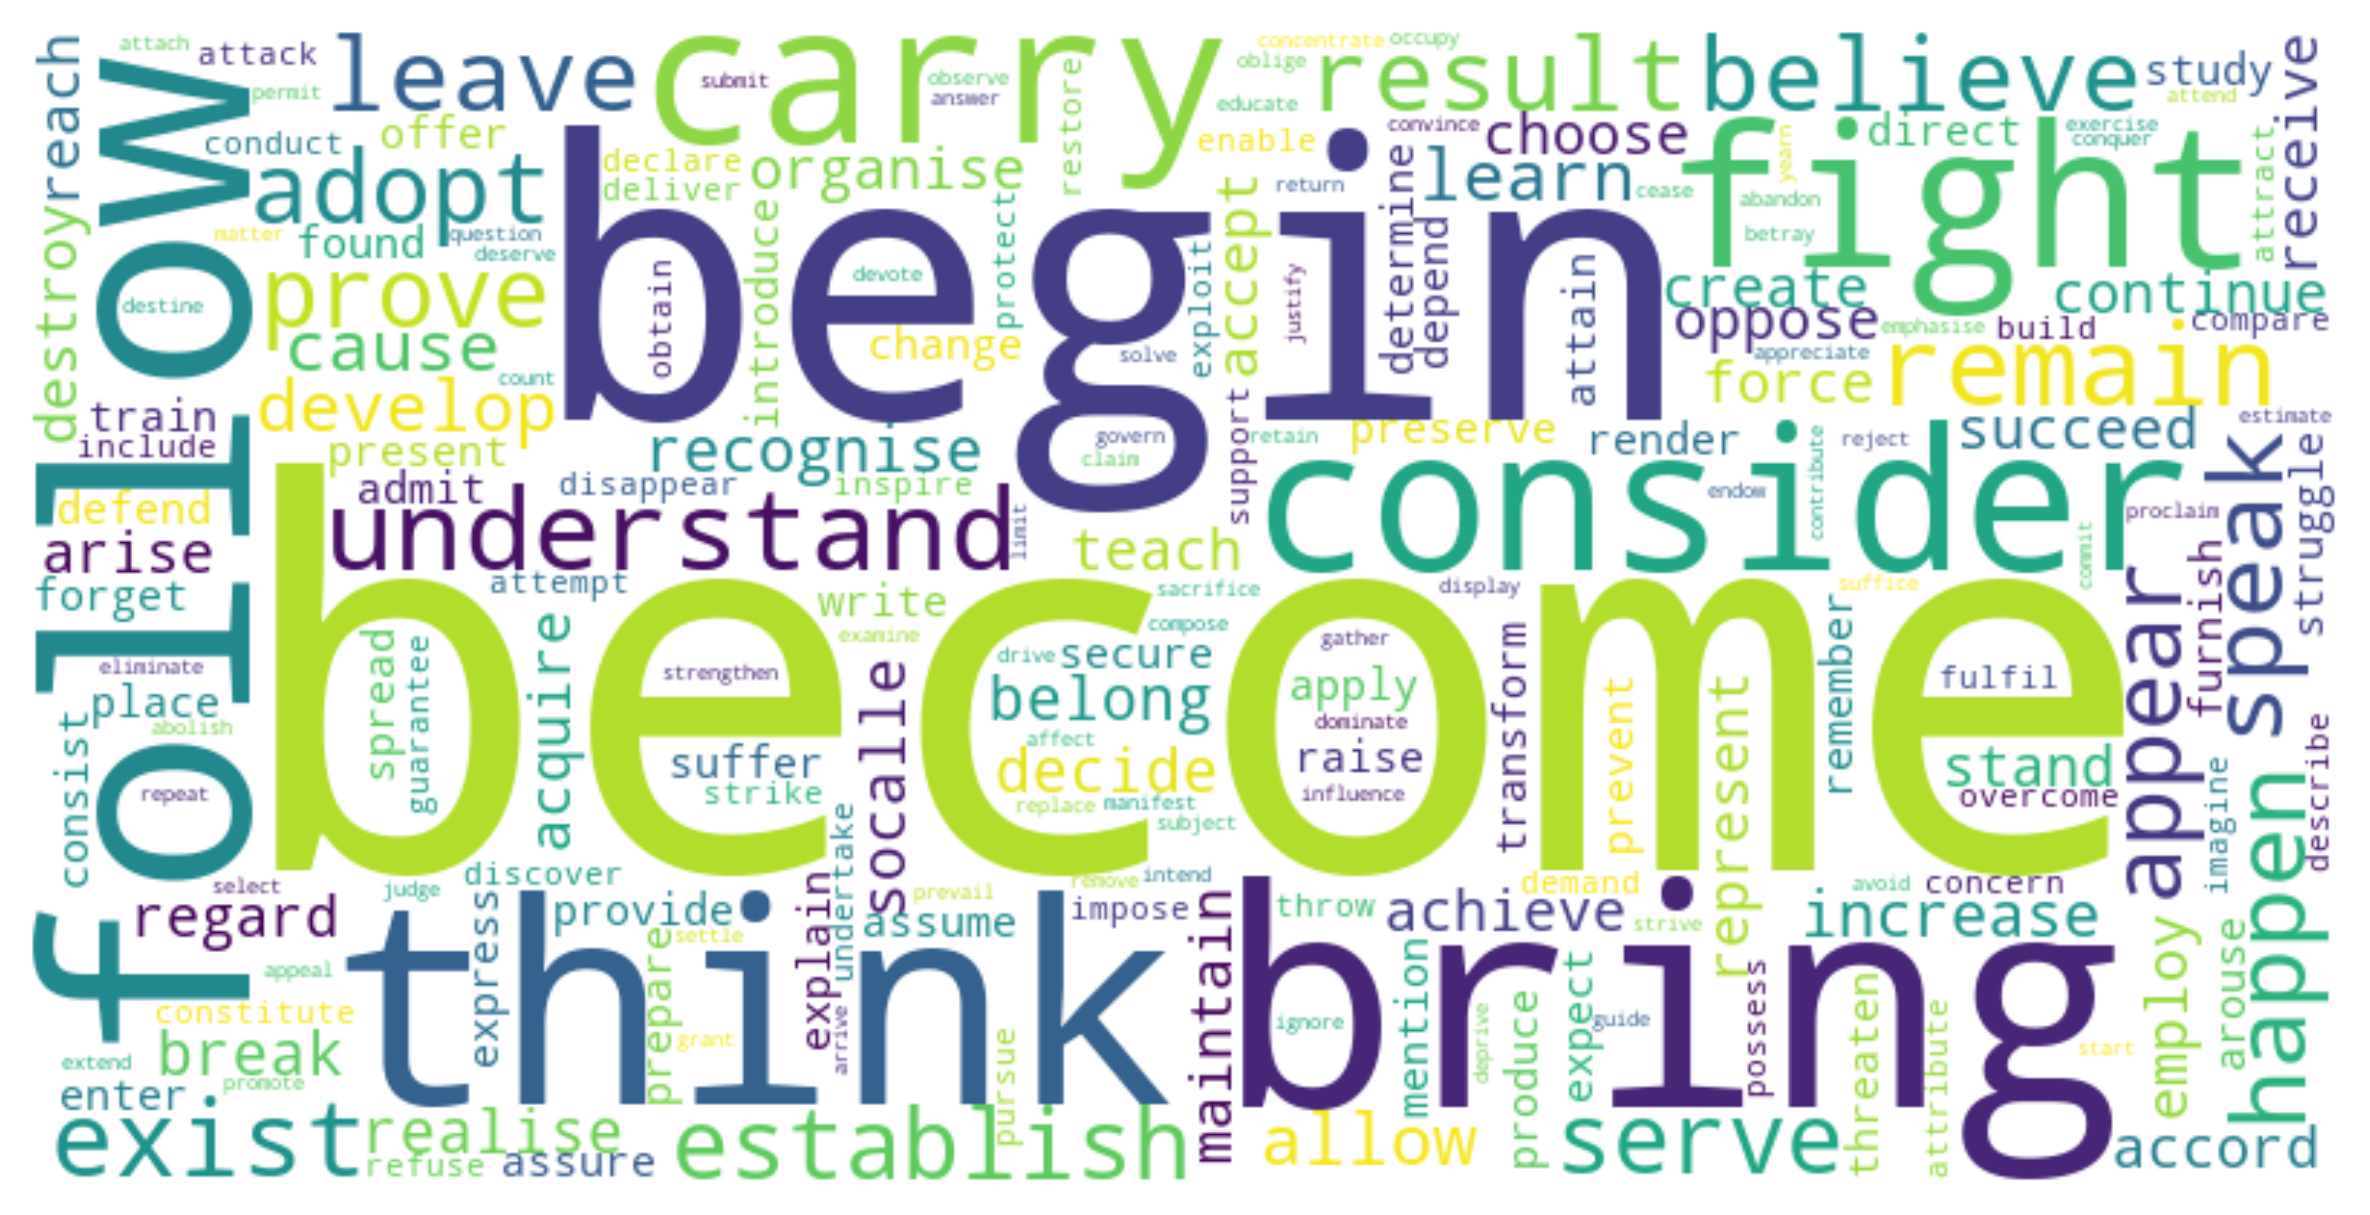

In [33]:
generate_word_cloud(wordlist_hitler)

In [23]:
count_specific_word(wordlist_hitler, word_input)

Häufigkeit von 'war': 290 mal mit einer Frequenz von 0.002333


#### Trump

In [ ]:
while True: 
    input_path_trump = input_pos
    
    if input_path_trump == "allwords":
        directory_path = ["/home/simon/bachelorarbeit/vergleich_mk_trump/cleaned_docs/all_words/clean_trump"]
        #directory_path = [r"C:\Users\Simon\Bachelorarbeit\vergleich_mk_trump\cleaned_docs\all_words\clean_trump"]
        break
    elif input_path_trump == "nouns":
        directory_path = ["/home/simon/bachelorarbeit/vergleich_mk_trump/cleaned_docs/nouns/clean_trump"]
        #directory_path = [r"C:\Users\Simon\Bachelorarbeit\vergleich_mk_trump\cleaned_docs\nouns\clean_trump"]
        break
    elif input_path_trump == "verbs":
        directory_path = ["/home/simon/bachelorarbeit/vergleich_mk_trump/cleaned_docs/verbs/clean_trump"]
        #directory_path = [r"C:\Users\Simon\Bachelorarbeit\vergleich_mk_trump\cleaned_docs\verbs\clean_trump"]
        break
    elif input_path_trump == "adjectives":
        directory_path = ["/home/simon/bachelorarbeit/vergleich_mk_trump/cleaned_docs/adjectives/clean_trump"]
        #directory_path = [r"C:\Users\Simon\Bachelorarbeit\vergleich_mk_trump\cleaned_docs\adjectives\clean_trump"]
        break
    else: 
        print("Falsche Eingabe!")

text_files_trump = []
for path in directory_path:
    text_files_trump.extend(glob.glob(f"{path}/*.txt"))

print(len(text_files_trump))
text_files_trump[:10]

In [ ]:
wordlist_trump = read_and_process_text_files(text_files_trump)

In [ ]:
count_and_print_most_frequent_words(wordlist_trump, 100)

In [ ]:
generate_word_cloud(wordlist_trump)

In [ ]:
count_specific_word(wordlist_trump, word_input)

#### Biden

In [ ]:
while True: 
    input_path_biden = input_pos
    
    if input_path_biden == "allwords":
        directory_path = ["/home/simon/bachelorarbeit/vergleich_mk_trump/cleaned_docs/all_words/clean_biden"]
        #directory_path = [r"C:\Users\Simon\Bachelorarbeit\vergleich_mk_trump\cleaned_docs\all_words\clean_biden"]
        break
    elif input_path_biden == "nouns":
        directory_path = ["/home/simon/bachelorarbeit/vergleich_mk_trump/cleaned_docs/nouns/clean_biden"]
        #directory_path = [r"C:\Users\Simon\Bachelorarbeit\vergleich_mk_trump\cleaned_docs\nouns\clean_biden"]
        break
    elif input_path_biden == "verbs":
        directory_path = ["/home/simon/bachelorarbeit/vergleich_mk_trump/cleaned_docs/verbs/clean_biden"]
        #directory_path = [r"C:\Users\Simon\Bachelorarbeit\vergleich_mk_trump\cleaned_docs\verbs\clean_biden"]
        break
    elif input_path_biden == "adjectives":
        directory_path = ["/home/simon/bachelorarbeit/vergleich_mk_trump/cleaned_docs/adjectives/clean_biden"]
        #directory_path = [r"C:\Users\Simon\Bachelorarbeit\vergleich_mk_trump\cleaned_docs\adjectives'\clean_biden"]
        break
    else: 
        print("Falsche Eingabe!")

text_files_biden = []
for path in directory_path:
    text_files_biden.extend(glob.glob(f"{path}/*.txt"))

print(len(text_files_biden))
text_files_biden[:10]

In [ ]:
wordlist_biden = read_and_process_text_files(text_files_biden)

In [ ]:
count_and_print_most_frequent_words(wordlist_biden, 100)

In [ ]:
generate_word_cloud(wordlist_biden)

In [ ]:
count_specific_word(wordlist_biden, word_input)

#### Bush

In [ ]:
while True: 
    input_path_bush = input_pos
    
    if input_path_bush == "allwords":
        directory_path = ["/home/simon/bachelorarbeit/vergleich_mk_trump/cleaned_docs/all_words/clean_bush"]
        #directory_path = [r"C:\Users\Simon\Bachelorarbeit\vergleich_mk_trump\cleaned_docs\all_words\clean_bush"]
        break
    elif input_path_bush == "nouns":
        directory_path = ["/home/simon/bachelorarbeit/vergleich_mk_trump/cleaned_docs/nouns/clean_bush"]
        #directory_path = [r"C:\Users\Simon\Bachelorarbeit\vergleich_mk_trump\cleaned_docs\nouns\clean_bush"]
        break
    elif input_path_bush == "verbs":
        directory_path = ["/home/simon/bachelorarbeit/vergleich_mk_trump/cleaned_docs/verbs/clean_bush"]
        #directory_path = [r"C:\Users\Simon\Bachelorarbeit\vergleich_mk_trump\cleaned_docs\verbs\clean_bush"]
        break
    elif input_path_bush == "adjectives":
        directory_path = ["/home/simon/bachelorarbeit/vergleich_mk_trump/cleaned_docs/adjectives/clean_bush"]
        #directory_path = [r"C:\Users\Simon\Bachelorarbeit\vergleich_mk_trump\cleaned_docs\adjectives\clean_bush"]
        break
    else: 
        print("Falsche Eingabe!")

text_files_bush = []
for path in directory_path:
    text_files_bush.extend(glob.glob(f"{path}/*.txt"))

print(len(text_files_bush))
text_files_bush[:10]

In [ ]:
wordlist_bush = read_and_process_text_files(text_files_bush)

In [ ]:
count_and_print_most_frequent_words(wordlist_bush, 100)

In [ ]:
generate_word_cloud(wordlist_bush)

In [ ]:
count_specific_word(wordlist_bush, word_input)

#### Obama

In [ ]:
while True: 
    input_path_obama = input_pos
    
    if input_path_obama == "allwords":
        directory_path = ["/home/simon/bachelorarbeit/vergleich_mk_trump/cleaned_docs/all_words/clean_obama"]
        #directory_path = [r"C:\Users\Simon\Bachelorarbeit\vergleich_mk_trump\cleaned_docs\all_words\clean_obama"]
        break
    elif input_path_obama == "nouns":
        directory_path = ["/home/simon/bachelorarbeit/vergleich_mk_trump/cleaned_docs/nouns/clean_obama"]
        #directory_path = [r"C:\Users\Simon\Bachelorarbeit\vergleich_mk_trump\cleaned_docs\nouns\clean_obama"]
        break
    elif input_path_obama == "verbs":
        directory_path = ["/home/simon/bachelorarbeit/vergleich_mk_trump/cleaned_docs/verbs/clean_obama"]
        #directory_path = [r"C:\Users\Simon\Bachelorarbeit\vergleich_mk_trump\cleaned_docs\verbs\clean_obama"]
        break
    elif input_path_obama == "adjectives":
        directory_path = ["/home/simon/bachelorarbeit/vergleich_mk_trump/cleaned_docs/adjectives/clean_obama"]
        #directory_path = [r"C:\Users\Simon\Bachelorarbeit\vergleich_mk_trump\cleaned_docs\adjectives\clean_obama"]
        break
    else: 
        print("Falsche Eingabe!")

text_files_obama = []
for path in directory_path:
    text_files_obama.extend(glob.glob(f"{path}/*.txt"))

print(len(text_files_obama))
text_files_obama[:10]

In [ ]:
wordlist_obama = read_and_process_text_files(text_files_obama)

In [ ]:
count_and_print_most_frequent_words(wordlist_obama, 100)

In [ ]:
generate_word_cloud(wordlist_obama)

In [ ]:
count_specific_word(wordlist_obama, word_input)

--------------

## In allen Texten gemeinsam vorkommende Wörter

#### Als Listen über Speicherung in Datei

In [ ]:
#listen in mengen umwandeln
set_hitler = set(wordlist_hitler)
set_trump = set(wordlist_trump)
set_biden = set(wordlist_biden)
set_bush = set(wordlist_bush)
set_obama = set(wordlist_obama)

#schnittmenge über intersection finden
common_words = set_hitler.intersection(set_trump, set_biden, set_bush, set_obama)

#ausgabe aller gemeinsamen wörter
#print("Überschneidende Wörter in allen Listen:", common_words)

In [ ]:
#listen in mengen umwandeln
set_hitler = set(wordlist_hitler)
set_trump = set(wordlist_trump)
set_biden = set(wordlist_biden)
set_bush = set(wordlist_bush)
set_obama = set(wordlist_obama)

#schnittmenge über intersection finden
common_words = set_hitler.intersection(set_trump, set_biden, set_bush, set_obama)

word_frequency = Counter()

for word_list in [wordlist_hitler, wordlist_trump, wordlist_biden, wordlist_bush, wordlist_obama]:
    word_frequency.update(word for word in word_list if word in common_words)

#sortiere die wörter nach ihrer häufigkeit in absteigender reihenfolge
sorted_words = word_frequency.most_common()

#ausgabe
#print("Wörter sortiert nach der Häufigkeit ihres Vorkommens:")
#for word, frequency in sorted_words:
    #print(f"{word}: {frequency}")

In [ ]:
#wort-listen zuweisen
text1 = wordlist_hitler
text2 = wordlist_trump
text3 = wordlist_biden
text4 = wordlist_bush
text5 = wordlist_obama

#n anzahl eingeben für spätere analyse und ausgabe in datei
n = int(input("Anzahl der Wörter eingeben (100, 200, 500, 1000)..."))

#n häufigste wörter filtern über funktion
def get_most_common_words(text, n):
    #words = text.split()
    counter = Counter(text)
    most_common_words = counter.most_common(n)
    return set(word for word, count in most_common_words)

#top 100 abrufen aus den texten
mc_hitler = get_most_common_words(text1, n)
mc_trump = get_most_common_words(text2, n)
mc_biden = get_most_common_words(text3, n)
mc_bush = get_most_common_words(text4, n)
mc_obama = get_most_common_words(text5, n)

#überschneidungen der jeweilgen wörter in den top n
common_words = set.intersection(mc_hitler, mc_trump, mc_biden, mc_bush, mc_obama)

#ausgabe innerhalb von jupyter
select_pos = input("Bitte eingeben, ob es um \"Wörter\", \"Substantive\", \"Adjektive\" oder \"Verben\" geht...").title()
print(f"\n{select_pos}, die in allen Texten enthalten sind:", common_words)

"""#ergebnis in text-datei schreiben
output_file = "common_words.txt"

with open(output_file, "a") as file:
    file.write(f"{select_pos}, die in allen Texten in den Top {n} enthalten sind:\n")
    file.write(str(list(common_words)) + "\n\n")

print(f"\nDas Ergebnis wurde in die Datei {output_file} geschrieben.")"""

-------------------

#### Alle Wörter (auch 0-Werte) in Datenrahmen ausgeben

In [ ]:
#listen in sets umwandeln
set_hitler2 = set(wordlist_hitler)
set_trump2 = set(wordlist_trump)
set_biden2 = set(wordlist_biden)
set_bush2 = set(wordlist_bush)
set_obama2 = set(wordlist_obama)

#defaultdict für die häufigkeit der wörter in den einzelnen listen
word_frequency = defaultdict(lambda: {'hitler': 0, 'trump': 0, 'biden': 0, 'bush': 0, 'obama': 0})

# zähle die häufigkeit der wörter in jeder liste
for word in set_hitler2:
    word_frequency[word]['hitler'] = wordlist_hitler.count(word)

for word in set_trump2:
    word_frequency[word]['trump'] = wordlist_trump.count(word)

for word in set_biden2:
    word_frequency[word]['biden'] = wordlist_biden.count(word)

for word in set_bush2:
    word_frequency[word]['bush'] = wordlist_bush.count(word)

for word in set_obama2:
    word_frequency[word]['obama'] = wordlist_obama.count(word)

#vorbereitung der daten für das pandas dataframe
data = []

#alle wörter aus allen listen hinzufügen
all_words = set_hitler2.union(set_trump2, set_biden2, set_bush2, set_obama2)

for word in all_words:
    data.append([word, word_frequency[word]['hitler'], word_frequency[word]['trump'], 
                 word_frequency[word]['biden'], word_frequency[word]['bush'], 
                 word_frequency[word]['obama']])

#erstellen des pandas dataframe mit benutzerdefinierten spaltennamen
df_all = pd.DataFrame(data, columns=['wort', 'hitler', 'trump', 'biden', 'bush', 'obama'])

#sortieren des dataframes nach der spalte 'wort' (optional)
df_all = df_all.sort_values(by='wort').reset_index(drop=True)

#ausgabe
print(df_all)

In [ ]:
"""#speichern des dataframe als excel-datei
excel_file_path = 'df_all.xlsx'  # Passe den Dateipfad und den Dateinamen an
df_all.to_excel(excel_file_path, index=False)
print(f'DataFrame wurde als Excel-Datei unter {excel_file_path} gespeichert.')

#speichern des dataframe als csv-datei
csv_file_path = 'df_all.csv'  # Passe den Dateipfad und den Dateinamen an
df_all.to_csv(csv_file_path, index=False)
print(f'DataFrame wurde als CSV-Datei unter {csv_file_path} gespeichert.')"""

In [ ]:
df_all_freq = df_all

#relative häufigkeiten berechnen
df_all_freq["hitler_freq"] = df_all_freq["hitler"]/df_all_freq["hitler"].sum()
df_all_freq["trump_freq"] = df_all_freq["trump"]/df_all_freq["trump"].sum()
df_all_freq["biden_freq"] = df_all_freq["biden"]/df_all_freq["biden"].sum()
df_all_freq["bush_freq"] = df_all_freq["bush"]/df_all_freq["bush"].sum()
df_all_freq["obama_freq"] = df_all_freq["obama"]/df_all_freq["obama"].sum()

df_all_freq = df_all_freq.drop(columns=df_all_freq.columns[1:6])
df_all_freq.rename(columns={'hitler_freq': 'hitler', 'trump_freq': 'trump','biden_freq': 'biden','bush_freq': 'bush','obama_freq': 'obama',}, inplace=True)

print(df_all_freq)

In [ ]:
#EIN BEZUGSWORT

#user input für gewünschte spalten-ausgabe
selected_columns_all = input("Bitte die gewünschten Spalten eingeben, getrennt durch ein Komma (z.B. 'hitler, trump, biden, bush, obama'): ").split(', ')
word_all_filter = input("Bitte das Wort eingeben, das gefiltert werden soll (z.B. 'abortion'): ")

#zeile mit dem spezifischen Wort filtern mit df.query
query_allstr = f'wort == "{word_all_filter}"'
df_all_word_query = df_all.query(query_allstr)[['wort'] + selected_columns_all] #df_all_freq

#nochmals nach frequenz ausgeben
df_all_word_query_freq = df_all_freq.query(query_allstr)[['wort'] + selected_columns_all]

print()
print(df_all_word_query)
print()
print(df_all_word_query_freq)

In [ ]:
#VERGLEICH MEHRERER WÖRTER NEBENEINANDER

#user_input
selected_columns = input("Bitte die gewünschten Spalten eingeben, getrennt durch ein Komma (z.B. 'hitler, trump, biden, bush, obama'): ").split(', ')

#wortliste für eingabe
words_to_filter_all = []
while True:
    word = input("Bitte ein Wort eingeben, das gefiltert werden soll (oder 'exit()' zum Beenden): ")
    if word.lower() == 'exit()':
        break
    words_to_filter_all.append(word)
 
#wortfilter nach anzahl
query_str_all = ' or '.join([f'wort == "{word}"' for word in words_to_filter_all])
filter_df_all = df_all.query(query_str_all)[['wort'] + selected_columns] if query_str_all else pd.DataFrame(columns=['wort'] + selected_columns)

#wortfilter nach frequenz
filter_df_all_query = df_all_freq.query(query_str_all)[['wort'] + selected_columns] if query_str_all else pd.DataFrame(columns=['wort'] + selected_columns)


print()
print(filter_df_all)
print()
print(filter_df_all_query)

---------------

#### Stichwörter aus Netflix-Dokumentation als Bezugspunkt über Datenrahmen einlesen und im Kontext vergleichen

In [ ]:
read_kwic = pd.read_csv("keywords_hitlerdoku.csv", delimiter=",", encoding="utf-8")
read_kwic.head()

In [ ]:
kwic_col = read_kwic["DokuNF"]
kwic_col.head()

In [ ]:
kw_list = []
for keyword in kwic_col:
    kw_list.append(keyword)
print(kw_list[:10])

In [ ]:
selected_columns_kw = input("Bitte die gewünschten Spalten eingeben, getrennt durch ein Komma (z.B. 'hitler, trump, biden, bush, obama'): ").split(', ')

# Iteriere über jedes Wort in der Liste und filtere die DataFrames
for keywords in kw_list:
    query_kw = f'wort == "{keywords}"'
    
    kw_query = df_all.query(query_kw)[['wort'] + selected_columns_kw] # df_all_freq
    kw_query_freq = df_all_freq.query(query_kw)[['wort'] + selected_columns_kw]
    
    #print(kw_query)
    #print()
    #print(kw_query_freq)
    #print()

In [ ]:
#gesamtes data frame in ausgabe anzeigen lassen
pd.set_option('display.max_rows', None)  # Keine Begrenzung der angezeigten Zeilen
pd.set_option('display.max_columns', None)  # Keine Begrenzung der angezeigten Spalten
pd.set_option('display.width', None)  # Passt die Breite der Anzeige automatisch an
pd.set_option('display.max_colwidth', None)  # Keine Begrenzung der Spaltenbreite


#neue ergebnis-liste erstellen
kw_query_list = []
kw_query_freq_list = []

for keyword in kw_list:
    query_kw = f'wort == "{keyword}"'
    
    kw_query = df_all.query(query_kw)[['wort'] + selected_columns_kw]
    
    #liste speichern
    kw_query_list.append(kw_query)


#liste für data frame filtern lassen
for keyword in kw_list:
    query_kw = f'wort == "{keyword}"'
    
    kw_query_freq = df_all_freq.query(query_kw)[['wort'] + selected_columns_kw]
    
    #liste speichern
    kw_query_freq_list.append(kw_query_freq)


#liste zu data frame konvertieren
df_kw = pd.concat(kw_query_list)
df_kw_freq = pd.concat(kw_query_freq_list)

#ausgabe
print(df_kw.reset_index())
print(2*"\n")
print(df_kw_freq.reset_index())

In [ ]:
#alle einträge mit mindestens 2 einträgen (also mind. 2 nicht-null-werten)
filter_col_freq = df_kw_freq[(df_kw_freq.iloc[:, 1:] > 0.000000).sum(axis=1) >= 2]

print(filter_col_freq.info())
print(filter_col_freq.reset_index())

In [ ]:
#es muss überall mindestens jedes wort 1x vorhanden sein
filter_col_freq_1x = df_kw_freq[(df_kw_freq.iloc[:, 1:] > 0).sum(axis=1) == 5]

print(filter_col_freq_1x.info())
print(filter_col_freq_1x)

In [ ]:
#0-checker: sicher gehen, dass wirklich keine 0-werte mehr enthalten sind
filter_col_freq_1x["hitler"][(filter_col_freq_1x["hitler"] < 0.000001)]

In [ ]:
#mean und median der spalten berechnen
mean_values = filter_col_freq_1x[['hitler', 'trump', 'biden', 'bush', 'obama']].mean()
print(mean_values)

print()

median_values = filter_col_freq_1x[['hitler', 'trump', 'biden', 'bush', 'obama']].median()
print(median_values)

----------------

#### Einschränkung der Wortauswahl über Mean und Median

In [ ]:
#es muss überall mindestens jedes wort 1x vorhanden sein
filter_col_mean_hitler = filter_col_freq_1x['hitler'] > filter_col_freq_1x['hitler'].mean()
filter_col_mean_trump = filter_col_freq_1x['trump'] > filter_col_freq_1x['trump'].mean()
filter_col_mean_biden = filter_col_freq_1x['biden'] > filter_col_freq_1x['biden'].mean()
filter_col_mean_bush = filter_col_freq_1x['bush'] > filter_col_freq_1x['bush'].mean()
filter_col_mean_obama = filter_col_freq_1x['obama'] > filter_col_freq_1x['obama'].mean()

#print(filter_col_mean_hitler)

filter_mean_all = filter_col_freq_1x[filter_col_mean_hitler & filter_col_mean_trump & filter_col_mean_biden & filter_col_mean_bush & filter_col_mean_obama]

print(filter_mean_all)

In [ ]:
#es muss überall mindestens jedes wort 1x vorhanden sein
filter_col_median_hitler = filter_col_freq_1x['hitler'] > filter_col_freq_1x['hitler'].median()
filter_col_median_trump = filter_col_freq_1x['trump'] > filter_col_freq_1x['trump'].median()
filter_col_median_biden = filter_col_freq_1x['biden'] > filter_col_freq_1x['biden'].median()
filter_col_median_bush = filter_col_freq_1x['bush'] > filter_col_freq_1x['bush'].median()
filter_col_median_obama = filter_col_freq_1x['obama'] > filter_col_freq_1x['obama'].median()

#print(filter_col_mean_hitler)

filter_median_all = filter_col_freq_1x[filter_col_median_hitler & filter_col_median_trump & filter_col_median_biden & filter_col_median_bush & filter_col_median_obama]

print(filter_median_all)

--------------------

#### Alle Wörter die mindestens 1x enthalten sind

In [ ]:
#zu untersuchende spalten eingeben
selected_columns = input("Bitte die gewünschten Spalten eingeben, getrennt durch ein Komma (z.B. 'hitler, trump, biden, bush, obama'): ").lower().split(', ')
print(selected_columns)

#zeilen filtern mit werten größer 0
filtered_df = df_all[['wort'] + selected_columns][(df_all[selected_columns] > 0).all(axis=1)]

print(filtered_df)

In [ ]:
"""#speichern des dataframe als excel-datei
excel_file_path = 'df_intersection_hitler_obama.xlsx' #hinteren teil anpassen z.B. _trump_hitler 
filtered_df.to_excel(excel_file_path, index=False)
print(f'DataFrame wurde als Excel-Datei unter {excel_file_path} gespeichert.')

#speichern des dataframe als csv-datei
csv_file_path = 'df_intersection_hitler_obama.csv' #ebenfalls hier: hinteren teil anpassen z.B. _trump_hitler 
filtered_df.to_csv(csv_file_path, index=False)
print(f'DataFrame wurde als CSV-Datei unter {csv_file_path} gespeichert.')"""

In [ ]:
df_all_freq2 = filtered_df

#relative häufigkeiten berechnen
df_all_freq2["hitler_freq"] = df_all_freq2["hitler"]/df_all_freq2["hitler"].sum()
df_all_freq2["trump_freq"] = df_all_freq2["trump"]/df_all_freq2["trump"].sum()
df_all_freq2["biden_freq"] = df_all_freq2["biden"]/df_all_freq2["biden"].sum()
df_all_freq2["bush_freq"] = df_all_freq2["bush"]/df_all_freq2["bush"].sum()
df_all_freq2["obama_freq"] = df_all_freq2["obama"]/df_all_freq2["obama"].sum()

df_all_freq2 = df_all_freq2.drop(columns=df_all_freq2.columns[1:6])
df_all_freq2.rename(columns={'hitler_freq': 'hitler', 'trump_freq': 'trump','biden_freq': 'biden','bush_freq': 'bush','obama_freq': 'obama',}, inplace=True)

print(df_all_freq2)

In [ ]:
# User Input (die gewünschten Spalten)
selected_columns2 = input("Bitte die gewünschten Spalten eingeben, getrennt durch ein Komma (z.B. 'hitler, trump, biden, bush, obama'): ").split(', ')
word_to_filter2 = input("Bitte das Wort eingeben, das gefiltert werden soll (z.B. 'abortion'): ")

# Zeile mit dem spezifischen Wort filtern mit df.query
query_str2 = f'wort == "{word_to_filter2}"'
df_word_query2 = filtered_df.query(query_str2)[['wort'] + selected_columns2]

#nochmals nach frequenz ausgeben
df_all_word_query_freq2 = df_all_freq2.query(query_allstr)[['wort'] + selected_columns2]

print()
print(df_word_query2)
print()
print(df_all_word_query_freq2)

In [ ]:
#user_input
selected_columns2 = input("Bitte die gewünschten Spalten eingeben, getrennt durch ein Komma (z.B. 'trump, hitler'): ").split(', ')

#wortliste für eingabe
words_to_filter2 = []
while True:
    word = input("Bitte ein Wort eingeben, das gefiltert werden soll (oder 'exit()' zum Beenden): ")
    if word.lower() == 'exit()':
        break
    words_to_filter2.append(word)

#wortfilter
query_str2 = ' or '.join([f'wort == "{word}"' for word in words_to_filter2])
filter_df2 = filtered_df.query(query_str2)[['wort'] + selected_columns2] if query_str2 else pd.DataFrame(columns=['wort'] + selected_columns2)

#wortfilter nach frequenz
filter_df_all_query2 = df_all_freq2.query(query_str2)[['wort'] + selected_columns2] if query_str2 else pd.DataFrame(columns=['wort'] + selected_columns2)


print()
print(filter_df2)
print()
print(filter_df_all_query2)

-----------------

## Konkordanzen finden

#### Funktionen

In [ ]:
def get_concordance(text, keyword, width, lines=5):
    textList = Text(text)
    lines = textList.concordance(keyword, width=width, lines=lines)
    return lines

In [ ]:
def get_concordance_list(text, keyword, width=100, lines=5):
    textList = Text(text)
    concordance_results = textList.concordance_list(keyword, width=width, lines=lines)
    formatted_lines = [' '.join(line.left) + ' ' + keyword + ' ' + ' '.join(line.right) for line in concordance_results]
    return formatted_lines

#### Hitler

In [ ]:
print(get_concordance(wordlist_hitler, word_input, width=100, lines=5))

In [ ]:
print(get_concordance_list(wordlist_hitler, word_input, width=22, lines=5))

#### Trump

In [ ]:
print(get_concordance(wordlist_trump, word_input, width=100, lines=5))

In [ ]:
print(get_concordance_list(wordlist_trump, word_input, width=22, lines=5))

#### Biden

In [ ]:
print(get_concordance(wordlist_biden, word_input, width=100, lines=5))

In [ ]:
print(get_concordance_list(wordlist_biden, word_input, width=22, lines=5))

#### Bush

In [ ]:
print(get_concordance(wordlist_bush, word_input, width=100, lines=5))

In [ ]:
print(get_concordance_list(wordlist_bush, word_input, width=22, lines=5))

#### Obama

In [ ]:
print(get_concordance(wordlist_obama, word_input, width=100, lines=5))

In [ ]:
print(get_concordance_list(wordlist_obama, word_input, width=22, lines=5))

------------------

## N-Gramme finden und filtern

#### Anzahl der Ausgaben eingeben

In [ ]:
n = int(input("Anzahl Ausgaben..."))

#### Funktionen für Analyse

In [ ]:
def get_top_n_bigrams(wordlist, n):
    #erstelle bigrams aus den tokens
    bigrams = list(nltk.bigrams(wordlist))
    
    #zähle die häufigkeit jedes bigrams
    bigram_counts = {}
    for bigram in bigrams:
        if bigram in bigram_counts:
            bigram_counts[bigram] += 1
        else:
            bigram_counts[bigram] = 1
    
    #sortiere die bigrams nach häufigkeit
    sorted_bigrams = sorted(bigram_counts.items(), key=lambda x: x[1], reverse=True)
    
    #nimm die ersten n bigrams
    top_n_bigrams = sorted_bigrams[:n]
    
    #ausgabe mit platzierung
    for idx, (bigram, count) in enumerate(top_n_bigrams, 1):
        print(f'{idx}. {bigram}, {count} mal')

In [ ]:
def get_top_n_filtered_bigrams(wordlist, n):
    #erstelle bigrams aus token
    bigrams = list(nltk.bigrams(wordlist))
    
    #filtere bigrams nach wortart-kombinationen
    valid_bigrams = []
    for bigram in bigrams:
        #bestimme die wortart-tags
        tagged_bigram = pos_tag(bigram)
        
        #filtere nach gewünschten kombinationen
        if (tagged_bigram[0][1] in ['JJ', 'NN'] and tagged_bigram[1][1] in ['NN', 'JJ']) or \
           (tagged_bigram[0][1] in ['NN'] and tagged_bigram[1][1] in ['VB']):
            valid_bigrams.append(bigram)
    
    #zähle die häufigkeit jedes bigrams
    bigram_counts = {}
    for bigram in valid_bigrams:
        if bigram in bigram_counts:
            bigram_counts[bigram] += 1
        else:
            bigram_counts[bigram] = 1
    
    #sortiere die bigrams nach häufigkeit
    sorted_bigrams = sorted(bigram_counts.items(), key=lambda x: x[1], reverse=True)
    
    #nimm die ersten n bigrams
    top_n_bigrams = sorted_bigrams[:n]
    
    #ausgabe mit platzierung
    for idx, (bigram, count) in enumerate(top_n_bigrams, 1):
        print(f'{idx}. {bigram}, {count} mal')

In [ ]:
import nltk
from nltk import pos_tag

def get_top_n_adj_noun_bigrams(wordlist, n=50):
    #erstelle bigrams aus den token
    bigrams = list(nltk.bigrams(wordlist))
    
    #filtere bigrams nach wortart-kombinationen
    valid_bigrams = []
    for bigram in bigrams:
        #bestimme die wortart-tags
        tagged_bigram = pos_tag(bigram)
        
        #filtere nach adjektiv gefolgt von nomen
        if tagged_bigram[0][1] == 'JJ' and tagged_bigram[1][1] == 'NN':
            valid_bigrams.append(bigram)
    
    #zähle die häufigkeit jedes bigrams
    bigram_counts = {}
    for bigram in valid_bigrams:
        if bigram in bigram_counts:
            bigram_counts[bigram] += 1
        else:
            bigram_counts[bigram] = 1
    
    #sortiere die bigrams nach häufigkeit
    sorted_bigrams = sorted(bigram_counts.items(), key=lambda x: x[1], reverse=True)
    
    #nimm die ersten n bigrams
    top_n_bigrams = sorted_bigrams[:n]
    
    #ausgabe mit platzierung
    for idx, (bigram, count) in enumerate(top_n_bigrams, 1):
        print(f'{idx}. {bigram}, {count} mal')

In [ ]:
def get_top_n_bigrams_with_input(wordlist, word_input, n=20):
    #bigrams nach user input
    #Abfrage des Benutzereingabe Wortes
    user_input = word_input
    
    #erstelle bigrams aus den token
    bigrams = list(nltk.bigrams(wordlist))
    
    #filtere bigrams nach benutzereingabe
    valid_bigrams = []
    for bigram in bigrams:
        if user_input in bigram[0] or user_input in bigram[1]:
            valid_bigrams.append(bigram)
    
    #zähle die häufigkeit jedes bigrams
    bigram_counts = {}
    for bigram in valid_bigrams:
        if bigram in bigram_counts:
            bigram_counts[bigram] += 1
        else:
            bigram_counts[bigram] = 1
    
    #sortiere die bigrams nach häufigkeit
    sorted_bigrams = sorted(bigram_counts.items(), key=lambda x: x[1], reverse=True)
    
    #nimm die ersten n bigrams
    top_n_bigrams = sorted_bigrams[:n]
    
    #ausgabe mit platzierung
    for idx, (bigram, count) in enumerate(top_n_bigrams, 1):
        print(f'{idx}. {bigram}, {count} mal')

#### Hitler

In [ ]:
get_top_n_bigrams(wordlist_hitler, n)

In [ ]:
get_top_n_filtered_bigrams(wordlist_hitler, n)

In [ ]:
get_top_n_adj_noun_bigrams(wordlist_hitler, n)

In [ ]:
get_top_n_bigrams_with_input(wordlist_hitler, word_input, n)

#### Trump

In [ ]:
get_top_n_bigrams(wordlist_trump, n)

In [ ]:
get_top_n_filtered_bigrams(wordlist_trump, n)

In [ ]:
get_top_n_adj_noun_bigrams(wordlist_trump, n)

In [ ]:
get_top_n_bigrams_with_input(wordlist_trump, word_input, n)

#### Biden

In [ ]:
get_top_n_bigrams(wordlist_biden, n)

In [ ]:
get_top_n_filtered_bigrams(wordlist_biden, n)

In [ ]:
get_top_n_adj_noun_bigrams(wordlist_biden, n)

In [ ]:
get_top_n_bigrams_with_input(wordlist_biden, word_input, n)

#### Bush

In [ ]:
get_top_n_bigrams(wordlist_bush, n)

In [ ]:
get_top_n_filtered_bigrams(wordlist_bush, n)

In [ ]:
get_top_n_adj_noun_bigrams(wordlist_bush, n)

In [ ]:
get_top_n_bigrams_with_input(wordlist_bush, word_input, n)

#### Obama

In [ ]:
get_top_n_bigrams(wordlist_obama, n)

In [ ]:
get_top_n_filtered_bigrams(wordlist_obama, n)

In [ ]:
get_top_n_adj_noun_bigrams(wordlist_obama, n)

In [ ]:
get_top_n_bigrams_with_input(wordlist_obama, word_input, n)